<a href="https://colab.research.google.com/github/Akshatha2004/DEEP_LEARNING_PROJECT/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install Required Libraries
!pip install -q transformers diffusers accelerate scipy safetensors
!pip install -q spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
# STEP 2: Import Libraries
import spacy
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

# Load SpaCy Model
nlp = spacy.load("en_core_web_sm")

# Load Stable Diffusion (Safe for CPU or GPU)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [2]:
# STEP 3: Input Story
story = """
Lila loved exploring the forest near her home. One sunny morning, she found a mysterious glowing flower.
Curious, she reached out to touch it. Suddenly, the flower sparkled and a tiny fairy appeared! The fairy smiled and said, “Thank you for freeing me! I will grant you one wish.” Lila wished for endless adventures, and from that day on, every walk in the forest brought magical surprises.
"""


In [3]:
# STEP 4: NLP Processing - Extract sentences and entities
doc = nlp(story)
sentences = [sent.text.strip() for sent in doc.sents]
print("Comic Scenes:", *sentences, sep="\n- ")


Comic Scenes:
- Lila loved exploring the forest near her home.
- One sunny morning, she found a mysterious glowing flower.
- Curious, she reached out to touch it.
- Suddenly, the flower sparkled and a tiny fairy appeared!
- The fairy smiled and said, “Thank you for freeing me!
- I will grant you one wish.”
- Lila wished for endless adventures, and from that day on, every walk in the forest brought magical surprises.


In [4]:
# STEP 5: Generate Prompts for Images
def generate_prompts(sentences):
    prompts = []
    for i, sentence in enumerate(sentences):
        prompt = f"Comic book style illustration of: {sentence}"
        prompts.append(prompt)
    return prompts

prompts = generate_prompts(sentences)
print("\nGenerated Prompts:")
for p in prompts:
    print("-", p)


Generated Prompts:
- Comic book style illustration of: Lila loved exploring the forest near her home.
- Comic book style illustration of: One sunny morning, she found a mysterious glowing flower.
- Comic book style illustration of: Curious, she reached out to touch it.
- Comic book style illustration of: Suddenly, the flower sparkled and a tiny fairy appeared!
- Comic book style illustration of: The fairy smiled and said, “Thank you for freeing me!
- Comic book style illustration of: I will grant you one wish.”
- Comic book style illustration of: Lila wished for endless adventures, and from that day on, every walk in the forest brought magical surprises.


In [5]:
# STEP 6: Generate Images from Prompts

output_dir = "comic_panels"
os.makedirs(output_dir, exist_ok=True)
images = []

for i, prompt in enumerate(prompts):
    print(f"Generating panel {i+1}...")

    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.0,         # keeps quality good
        height=448, width=448       # smaller → faster
    ).images[0]

    image_path = f"{output_dir}/panel_{i+1}.png"
    image.save(image_path)

    images.append(image)

    print(f"Generated: {image_path}")

print("All panels generated successfully")


Generating panel 1...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_1.png
Generating panel 2...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_2.png
Generating panel 3...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_3.png
Generating panel 4...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_4.png
Generating panel 5...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_5.png
Generating panel 6...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_6.png
Generating panel 7...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated: comic_panels/panel_7.png
All panels generated successfully


In [6]:
# STEP 7: Add Dialogue (Optional Simplified Example)
def add_text_to_image(image, text):
    draw = ImageDraw.Draw(image)
    width, height = image.size
    font = ImageFont.load_default()
    bubble_x = 10
    bubble_y = height - 40
    draw.rectangle([bubble_x, bubble_y, width-10, height-10], fill="white", outline="black")
    draw.text((bubble_x+10, bubble_y+5), text, font=font, fill="black")
    return image

comic_strip = []
for i in range(len(images)):
    img = add_text_to_image(images[i], sentences[i])
    comic_strip.append(img)


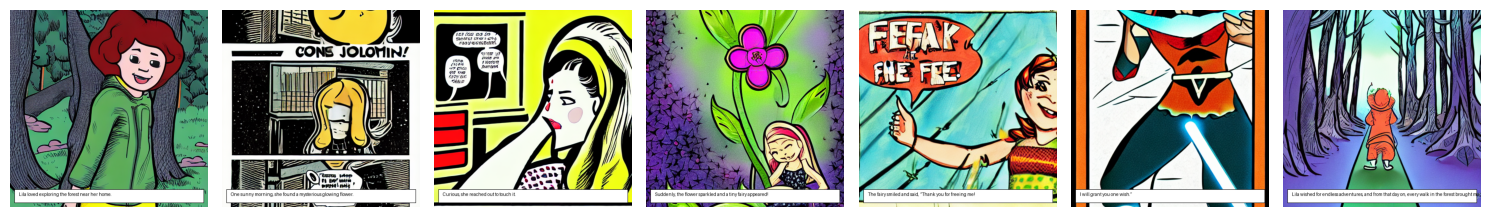

In [7]:
# STEP 8: Display Comic Strip
def display_strip(images):
    fig, axs = plt.subplots(1, len(images), figsize=(15,5))
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

display_strip(comic_strip)


In [8]:
# STEP 9: Bio-Inspired Optimization Using Genetic Algorithm (GA)
# This GA evolves your image prompts to generate higher quality comic panels.

import random

# --- MUTATION: Add good visual keywords to improve prompt ---
def mutate_prompt(prompt):
    extra_words = [
        "high quality", "vibrant colors", "comic book art",
        "sharp details", "smooth lines", "cinematic lighting",
        "high contrast", "beautiful illustration"
    ]
    return prompt + ", " + random.choice(extra_words)

# --- FITNESS FUNCTION: Score prompt quality ---
# For simplicity, longer prompts = better (you can replace with image-quality ML score later)
def fitness(prompt):
    return len(prompt)

# --- GENETIC ALGORITHM ---
def genetic_algorithm(prompts, generations=3, population_size=3):
    optimized_prompts = []

    for prompt in prompts:
        # Initial population = original + mutations
        population = [prompt] + [mutate_prompt(prompt) for _ in range(population_size)]

        for gen in range(generations):
            # Evaluate population
            scored = sorted(population, key=lambda x: fitness(x), reverse=True)

            # Select best
            best = scored[0]

            # Form new generation (elitism + mutations)
            population = [best] + [mutate_prompt(best) for _ in range(population_size)]

        optimized_prompts.append(population[0])  # best final result

    return optimized_prompts


# Run GA optimization
optimized_prompts = genetic_algorithm(prompts)

print("\n=== Optimized Prompts After GA (Bio-Inspired) ===")
for p in optimized_prompts:
    print("-", p)



=== Optimized Prompts After GA (Bio-Inspired) ===
- Comic book style illustration of: Lila loved exploring the forest near her home., cinematic lighting, beautiful illustration, cinematic lighting
- Comic book style illustration of: One sunny morning, she found a mysterious glowing flower., beautiful illustration, cinematic lighting, cinematic lighting
- Comic book style illustration of: Curious, she reached out to touch it., cinematic lighting, beautiful illustration, cinematic lighting
- Comic book style illustration of: Suddenly, the flower sparkled and a tiny fairy appeared!, vibrant colors, cinematic lighting, beautiful illustration
- Comic book style illustration of: The fairy smiled and said, “Thank you for freeing me!, cinematic lighting, comic book art, cinematic lighting
- Comic book style illustration of: I will grant you one wish.”, beautiful illustration, comic book art, sharp details
- Comic book style illustration of: Lila wished for endless adventures, and from that da

In [10]:
# STEP 10: Regenerate Comic Panels Using Optimized Prompts

print("\n=== Regenerating Comic Panels Using GA-Optimized Prompts ===")

output_dir_opt = "comic_panels_optimized"
os.makedirs(output_dir_opt, exist_ok=True)
optimized_images = []

for i, prompt in enumerate(optimized_prompts):
    print(f"Generating optimized panel {i+1}...")

    image = pipe(
        prompt,
        num_inference_steps=25,   # slightly more steps for better output
        guidance_scale=8.0,       # more guidance = sharper images
       height=448,
       width=448


    ).images[0]

    image_path = f"{output_dir_opt}/optimized_panel_{i+1}.png"
    image.save(image_path)

    optimized_images.append(image)

    print(f"Generated: {image_path}")

print("All optimized comic panels generated successfully!")



=== Regenerating Comic Panels Using GA-Optimized Prompts ===
Generating optimized panel 1...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_1.png
Generating optimized panel 2...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_2.png
Generating optimized panel 3...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_3.png
Generating optimized panel 4...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_4.png
Generating optimized panel 5...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_5.png
Generating optimized panel 6...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_6.png
Generating optimized panel 7...


  0%|          | 0/25 [00:00<?, ?it/s]

Generated: comic_panels_optimized/optimized_panel_7.png
All optimized comic panels generated successfully!


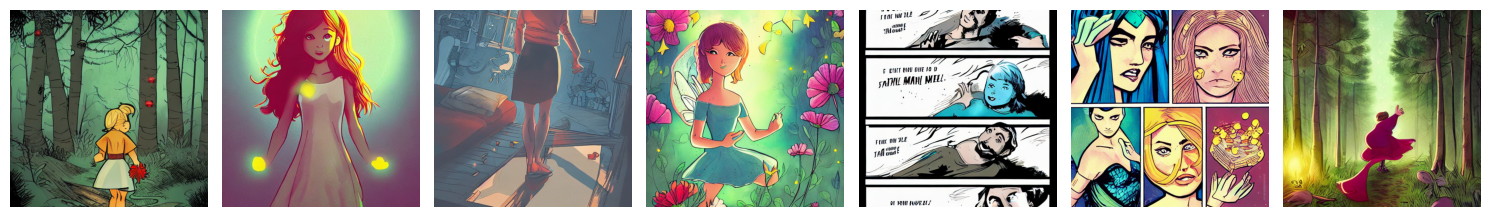

In [11]:
# STEP 11: Display Optimized Comic Strip

def display_strip(images):
    fig, axs = plt.subplots(1, len(images), figsize=(15,5))c
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

display_strip(optimized_images)

